<a href="https://colab.research.google.com/github/Crescebdo/pvz-tensorflow/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [80]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [81]:
img_height = 100
img_width = 80
batch_size = 2

In [88]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ize-tensorflow/data1',
    labels="inferred",
    label_mode="int",  # categorical, binary
    class_names=['-1', '0', '1', '3','4','5','6','7','8','10','13','17','18','21','22','28','29','31','34','37'],
    color_mode="rgb",
    image_size=(img_height, img_width),  # reshape if not in this size
    seed=123,
    validation_split=0.2,
    subset="training",
)

Found 500 files belonging to 20 classes.
Using 400 files for training.


In [89]:
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ize-tensorflow/data1',
    labels="inferred",
    label_mode="int",  # categorical, binary
    class_names=['-1', '0', '1', '3','4','5','6','7','8','10','13','17','18','21','22','28','29','31','34','37'],
    color_mode="rgb",
    image_size=(img_height, img_width),  # reshape if not in this size
    seed=123,
    validation_split=0.2,
    subset="validation",
)

Found 500 files belonging to 20 classes.
Using 100 files for validation.


[[ 14  74  72]
 [ 13  75  72]
 [ 13  75  74]
 [ 14  76  75]
 [  5  65  63]
 [ 15  74  72]
 [ 19  74  71]
 [ 17  67  64]
 [ 27  73  70]
 [ 46  91  86]
 [ 55  96  92]
 [ 47  92  89]
 [ 37  91  91]
 [ 19  77  79]
 [ 10  68  70]
 [ 11  69  71]
 [ 13  71  73]
 [  8  66  68]
 [  6  64  66]
 [  9  67  69]
 [ 12  70  72]
 [ 12  70  72]
 [ 11  69  71]
 [ 11  69  71]
 [ 11  69  71]
 [ 11  69  71]
 [ 10  68  70]
 [ 10  68  70]
 [ 11  71  71]
 [ 12  72  72]
 [ 13  71  72]
 [ 14  72  73]
 [ 14  72  73]
 [ 36  80  77]
 [143 123 101]
 [137 121  99]
 [ 73  95  86]
 [ 23  76  75]
 [ 18  72  74]
 [ 18  72  74]
 [ 18  72  74]
 [ 18  72  74]
 [ 18  72  74]
 [ 18  72  74]
 [ 16  69  73]
 [ 16  69  73]
 [ 16  69  73]
 [ 15  68  72]
 [ 15  68  72]
 [ 14  67  71]
 [ 14  67  71]
 [ 14  67  71]
 [ 14  67  71]
 [ 14  67  71]
 [ 13  66  70]
 [ 12  65  69]
 [ 12  65  69]
 [ 13  66  70]
 [ 13  66  70]
 [ 14  67  71]
 [ 19  70  73]
 [ 15  66  69]
 [ 14  65  68]
 [ 16  67  70]
 [ 17  68  71]
 [ 16  67  70]
 [ 16  69 

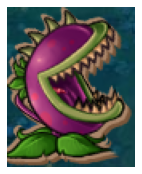

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        print(images[i].numpy().astype("uint8")[0])
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        break
        plt.title(int(labels[i]))
        


In [94]:
model = tf.keras.Sequential([
      layers.Input((100, 80, 3)),
        layers.Conv2D(16, 3, padding="same"),
        layers.Conv2D(32, 3, padding="same"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(20),
])

In [95]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [96]:
model.fit(ds_train, epochs=10, verbose=2)

Epoch 1/10
13/13 - 36s - loss: 177.0656 - accuracy: 0.6575 - 36s/epoch - 3s/step
Epoch 2/10
13/13 - 5s - loss: 2.8913 - accuracy: 0.9700 - 5s/epoch - 411ms/step
Epoch 3/10
13/13 - 5s - loss: 4.4400 - accuracy: 0.9800 - 5s/epoch - 414ms/step
Epoch 4/10
13/13 - 5s - loss: 0.7703 - accuracy: 0.9925 - 5s/epoch - 411ms/step
Epoch 5/10
13/13 - 5s - loss: 0.0163 - accuracy: 0.9975 - 5s/epoch - 409ms/step
Epoch 6/10
13/13 - 5s - loss: 0.0000e+00 - accuracy: 1.0000 - 5s/epoch - 411ms/step
Epoch 7/10
13/13 - 5s - loss: 0.0000e+00 - accuracy: 1.0000 - 5s/epoch - 408ms/step
Epoch 8/10
13/13 - 5s - loss: 0.0000e+00 - accuracy: 1.0000 - 5s/epoch - 410ms/step
Epoch 9/10
13/13 - 5s - loss: 0.0000e+00 - accuracy: 1.0000 - 5s/epoch - 409ms/step
Epoch 10/10
13/13 - 5s - loss: 0.0000e+00 - accuracy: 1.0000 - 5s/epoch - 412ms/step


In [97]:
test_loss, test_acc = model.evaluate(ds_validation, verbose=2)

print('\nTest accuracy:', test_acc)

4/4 - 33s - loss: 0.0000e+00 - accuracy: 1.0000 - 33s/epoch - 8s/step

Test accuracy: 1.0


In [98]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 80, 16)       448       
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 80, 32)       4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 40, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 64000)             0         
                                                                 
 dense_4 (Dense)             (None, 20)                1280020   
                                                                 
Total params: 1,285,108
Trainable params: 1,285,108
Non-trainable params: 0
____________________________________________

In [100]:
model.save("model.h5")
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras '/content/model.h5' '/content/drive/MyDrive/model'

In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')
loss, acc = new_model.evaluate(ds_train, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))


200/200 - 2s - loss: 0.0000e+00 - accuracy: 1.0000 - 2s/epoch - 10ms/step
Restored model, accuracy: 100.00%
